# **The "Digital Eye" (MNIST)**

**The Mission:** Build a brain that can read human handwriting. **The Data**: 70,000 images of handwritten digits (0-9). This is the famous **MNIST** dataset (the "Hello World" of Computer Vision).

#### Step 1: Load the data
We don't need to download a CSV. This dataset is so famous that it comes built-in with TensorFlow.

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load MNIST dataset
# x_train: The images (28x28 pixels)
# y_train: The labels (The number 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training Data Shape: {x_train.shape}")
print(f"Test Data Shape: {x_test.shape}")

Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


#### Step 2: See what the Computer Sees
Before we train, we must understand our input. To a computer, an image is just a grid of numbers from 0 (black) to 255 (white).

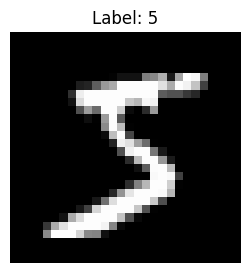

Raw Pixel Values (Center of image):
[[  1 154 253  90   0]
 [  0 139 253 190   2]
 [  0  11 190 253  70]
 [  0   0  35 241 225]
 [  0   0   0  81 240]]


In [11]:
# 1. Pick an image (Let's look at the first one)
i = 0
image = x_train[i]
label = y_train[i]

# 2. Visualize it
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

# 3. Peek at the raw numbers (The "Matrix")
print(f"Raw Pixel Values (Center of image):\n{image[10:15, 10:15]}")

#### Step 3: Preprocessing (The "Normalize" Trick)
Neural Network are like picky eaters. They hate big numbers (0-255). They prefer small numbers between **0 - 1**. If we feed them "255", the math explodes and training fails.

In [12]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"New Max Pixel Value: {x_train.max()}")

New Max Pixel Value: 1.0


#### Step 4: Build the Brain
This is the moment of truth. We will build a **Sequential Neural Network**.

Think of it like a sandwich:
1. **Input Layer (`Flatten`)**: Takes the 2D image (28x28) and squashes it into a long line of 784 pixels (1D).
2. **Hidden Layer (`Dense`)**: The *"Brain Cells"*. We will add 128 neurons. They will try to find patterns (loops, lines).
3. **Output Layer (`Dense`)**: 10 neurons (one for each digit 0-9). The one that lights up the brightest is the prediction.

In [13]:
model = keras.Sequential([
    # Layer 1: Explicit Input Layer
    keras.Input(shape=(28, 28)),

    # Layer 2: Flatten 2D images to 1D array
    keras.layers.Flatten(),

    # Layer 3: The Hidden Layer (128 Neurons)
    # 'relu' is the activation function (it turns negative numbers to 0)
    keras.layers.Dense(128, activation='relu'),

    # Layer 4: The Output Layer (10 Neurons or digits 0-9)
    # 'softmax' turns the output into probabilities (e.g., "90% chance it's a 5")
    keras.layers.Dense(10, activation='softmax')
])

# Print the architecture summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### **Explanation:**

1. **The Flatten Layer (`flatten_1`)**
* **Output Shape `(None, 784)`:** This is the *"Unrolling"* step.
    * We started with a square image (28 pixels x 28 pixels).
    * The model can't read squares; it needs a straight line of numbers.
    * So, 28 x 28 = 784.
* **Param # `0`:** This layer has **0** things to learn. It just reshapes the data. It's like unfolding a map-the information is the same, just laid out differently.

2. **The Hidden Layer (`dense_2`)**
* **Output Shape `(None, 128)`:** We chose to have **128 neurons** (brain cells) in this layer to look for patterns.
* **Param # `100,480`: (This is the important part)**
    * Every single one fo the 784 pixels connects to every single one of the 128 neurons. That is a massive web of connections!
    * **The Math**: 784 inputs x 128 neurons = 100,352 connections.
    * **The Bias**: Plus, every neuron gets 1 extra *"Bias"* variable (like the y-intercept *b* in *y = mx + b*). So add 128.
    * **Total**: 100,352 + 128 - 100,480
    * **Meaning**: There are **100,480** **tiny knobs** here that the AI will twist and turn during training to learn what a *"circle"* or a *"straight line"* looks like.

3. **The Output Layer (`dense_3`)**
* **Output Shape** `(None, 10)`: The final answer must be one of the 10 digits (0 through 9).
* **Param #** `1,290`:
    * The 128 neurons from the previous layer connect to these 10 final neurons.
    * **The Math**: 128 x 10 = 1,280
    * **The Bias**: Add 10 biases
    * **Total**: 1,290

> **The Big Picture**
> **Total params: 101,770:** Your model has **~100,000 trainable parameters**. Think of it like a radio mixing board with 100,000 sliders. When you run `model.fit()`, the computer frantically moves all 100,000 sliders at once to try and get the music (the prediction) to sound perfect.

---

#### **Step 5: Compile & Train**
We have to give the model three instructions before it starts:
1. **Optimizer** (`adam`): This is the *"Teacher."* It tells the model how to adjust those 100,000 knobs to reduce errors. `Adam` is the best general-purpose teacher.
2. **Loss Function** (`sparse_categorical_crossentropy`): This is the *'Scoreboard"*. It calculates how wrong the answer was (e.g., *"You guessed 7, but it was a 2. That's a huge error!"*)
3. **Metrics** (`accuracy`): This is what we care about. *"Did you get it right? Yes or No?"*

In [14]:
# 1. Compile (Configuring the learning process)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train (The heavy lifting)
# x_train, y_train: The study material (Images + Correct Answers)
# epochs=5: Go through the entire textbook 5 times
print("Starting training...")
history = model.fit(x_train, y_train, epochs=5)

Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9279 - loss: 0.2571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9663 - loss: 0.1142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9768 - loss: 0.0784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9823 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9862 - loss: 0.0457


**98,62% accuracy!**

That means the model has effectively memorized the training textbook. It can recognize the digits in the training set almost perfectly.

---

#### **Step 6: The "Final Exam" (Evaluation)**
But.... does it *actually* understand handwriting, or did it just memorize the specific 60,000 images we showed it?

We need to test it on the **10,000 images it has never seen before** (the `x_test` set). This is the moment of truth.

In [15]:
# Evaluate on the Test Set (Unseen Data)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9763 - loss: 0.0766

Test Accuracy: 0.9763


**97,6% Perfect!**

---

#### **Step 7: Let's See it in action**
Numbers are boring. Let's see the model actually *read* a picture.

We will pick a random image from the test set, show it to you, and then ask the model what it thinks it is.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


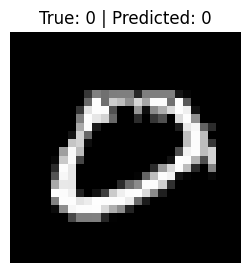

Confidence Scores:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
# 1. Pick a random test image
import random
i = random.randint(0, 10000)
img = x_test[i]
true_label = y_test[i]

# 2. Ask the model to predict
# (We have to reshape it to (1, 28, 28) because the model expects a batch of images, not just one)
prediction = model.predict(img.reshape(1, 28, 28))
predicted_label = np.argmax(prediction) # Get the index of the highest probability

# 3. Show the result
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# 4. Show the confidence scores (Probabilty for each number 0-9)
print(f"Confidence Scores:\n{prediction.round(2)}")